In [4]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
#import the data and indicate X and y

In [6]:
diabetes=pd.read_csv("../input/diabetes.csv")
df=diabetes.copy()
df=df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# We will try to improve ML model to predict that when the new patient has come, he/she has diabetes or not.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

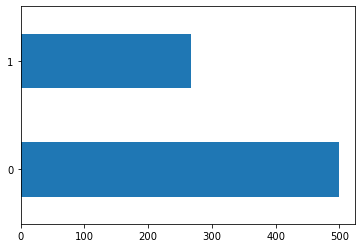

In [10]:
df["Outcome"].value_counts().plot.barh();

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y=df["Outcome"]

In [13]:
X=df.drop("Outcome", axis=1)

In [14]:
#set and fit the model with statsmodels

In [15]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 24 May 2020   Pseudo R-squ.:                 0.05922
Time:                        11:42:16   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [16]:
#We didn't split the data, first we will apply log. reg. to whole data for easy learning. 
#After understand the issue, we will apply the rules on splitted data

In [17]:
#set and fit the model with sklearn

In [18]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
loj_model.intercept_   #beta0

array([-5.86287347])

In [20]:
loj_model.coef_       #all of the other betas(beta1...-beta8)

array([[ 1.16994001e-01,  2.83105146e-02, -1.69330434e-02,
         7.60583358e-04, -6.35908885e-04,  5.94454510e-02,
         6.72330649e-01,  7.15329890e-03]])

In [21]:
#Model Tuning
# NOTE: There isn't ANY hiperparameter(external parameter) for logistic reg. Therefore, model tuning means confirmation
# So, we can only optimize beta0.

In [22]:
y_pred=loj_model.predict(X)

In [23]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]])

In [24]:
accuracy_score(y,y_pred)  # (True Pozitive+True Negative)/ All. This is primitive, we haven't verified it

0.7747395833333334

In [25]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [26]:
loj_model.predict(X)[0:5]    #predictions

array([1, 0, 1, 0, 1])

In [27]:
loj_model.predict_proba(X)[0:5]   #first column give us the probability of being in class 0
                                  #second column gives us the probabilty of being in class 1 so we consider this column

array([[0.35135889, 0.64864111],
       [0.91652333, 0.08347667],
       [0.22513673, 0.77486327],
       [0.92079448, 0.07920552],
       [0.16874003, 0.83125997]])

In [28]:
y[0:5]   #real values

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
#we will specify a threshold(ex. 0.5) and if the proba exceeds the threshold we will say that it is from class 1

In [30]:
y_probs=loj_model.predict_proba(X)
y_probs=y_probs[:,1]

In [31]:
y_probs[0:5]

array([0.64864111, 0.08347667, 0.77486327, 0.07920552, 0.83125997])

In [32]:
y_pred=[1 if i>0.5 else 0 for i in y_probs]

In [33]:
y_pred[0:5]   #we found classes manually

[1, 0, 1, 0, 1]

In [34]:
print(classification_report(y,y_pred))   #confussion_matrix

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



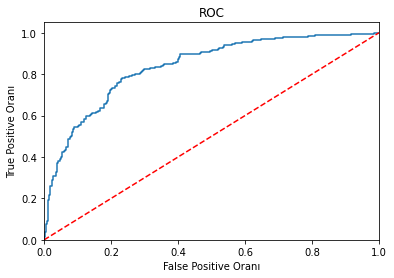

In [35]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()



In [36]:
# Easy learning trial is finished. 
# Now, we apply rules on splitted data and find the RIGHT accuracy rate and gain the REAL test error.
#Normally, we follow these rules.. 

In [37]:
#Model Accuracy
#split data train test
#gain an error with cv

In [38]:
# 1) split the data into train-test

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

In [40]:
# 2) set and fit the model

In [41]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# 3) Gain the test error

In [43]:
y_pred= loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

In [44]:
# 4) CV-Cross Validated score (it means verified error)

In [45]:
cross_val_score(loj_model,X_test,y_test,cv=10).mean()

0.7661231884057971